### **Intrusion Detection System(IDS) in Internet of Vehicles(IOV) --- Tree Based ALGORITHMS**
 

**[AV]**  Autonomous Vehicle + **[IOV] **Internet of vehicle = **[ITS]**Intelligent Transport Systems

**[AV]**  = **[V2X]** Vehicle to Public**[V2P]**, Vehicle**[V2V]**, Infra**[V2I]** 

 **[IDS]** <--**[AV]** + **[IOV]** <-- External /Internal Communication Threat

**Dataset:**  **CICID 2017**- Standard Attack Scenario___________________           [28,30,743  x 79] 
 
 **Pre Processing :** Normalization ,Encoder_____________________________[56,661 x 79]
 
 **Oversampling   :** **SMOTE** <-- Handle Class Imbalance Data ______________{4 :1500}

**Models ⁉**

                    Accuracy     Acc(with Imp Feature)
    Decision Tree  : 99.67 %             99.68 %
    Random Forest  : 99.62 %             99.74 %
    Extra Trees    : 99.53 %             99.64 % 
    XGBoost        : 99.55 %             99.53 %
    ________________________________________________
    Stack          : 96.63 %             99.63 %


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from zipfile import ZipFile

In [ ]:
path = "/content/drive/MyDrive/datasets/CIC-IDS-2017"
comm_file = "/MachineLearningCSV.zip"

file = f"{path}{comm_file}"

with ZipFile(file,'r') as archive:
  archive.extractall(f"{path}")

archive.close()

In [ ]:
# path = "/content/drive/MyDrive/datasets/CIC-IDS-2017"
# comm_file = "/GeneratedLabelledFlows.zip"
# 
# file = f"{path}{comm_file}"
# 
# with ZipFile(file,'r') as archive:
#   archive.extractall(f"{path}")
# 
# archive.close()

## **Preprocessing**

In [ ]:
ds_path = f"{path}/MachineLearningCVE"
df = pd.concat([pd.read_csv(f, sep=',') for f in glob.glob(ds_path + "/*.csv")],ignore_index=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df.shape

(2830743, 79)

In [ ]:
df.isnull().sum().sum()

1358

In [ ]:
df.columns.values.tolist()

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 ' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Min Packet Length',
 ' Max Packet Length',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' P

In [ ]:
df = df.rename(columns=lambda x: x.strip())

In [ ]:
df['Label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [ ]:
df['Label'] = df['Label'].replace(['DoS Hulk', 'DDoS', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'Heartbleed'], 'DoS')
df['Label'] = df['Label'].replace(['Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection'], 'WebAttack')
df['Label'] = df['Label'].replace(['FTP-Patator', 'SSH-Patator'], 'BruteForce')

In [ ]:
df['Label'].value_counts()

BENIGN          2273097
DoS              380699
PortScan         158930
BruteForce        13835
WebAttack          2180
Bot                1966
Infiltration         36
Name: Label, dtype: int64

In [ ]:
df_minor = df[(df['Label']=='WebAttack')|(df['Label']=='Bot')|(df['Label']=='Infiltration')]
df_BENIGN = df[(df['Label']=='BENIGN')]
df_BENIGN = df_BENIGN.sample(n=None, frac=0.01, replace=False, weights=None, random_state=None, axis=0)
df_DoS = df[(df['Label']=='DoS')]
df_DoS = df_DoS.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_PortScan = df[(df['Label']=='PortScan')]
df_PortScan = df_PortScan.sample(n=None, frac=0.05, replace=False, weights=None, random_state=None, axis=0)
df_BruteForce = df[(df['Label']=='BruteForce')]
df_BruteForce = df_BruteForce.sample(n=None, frac=0.2, replace=False, weights=None, random_state=None, axis=0)

In [ ]:
df_s = pd.concat([df_BENIGN, df_DoS, df_PortScan, df_BruteForce, df_minor], ignore_index=True)
df_s

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,527,1,1,61,89,61,61,61.00,0.000000,...,20,0.0,0.0000,0,0,0.00,0.00000,0,0,BENIGN
1,443,85623762,16,21,3180,6972,2781,0,198.75,690.827764,...,20,164164.5,383424.6181,1113092,28439,9999966.25,458.31329,10000000,9999427,BENIGN
2,53,193,2,2,46,46,23,23,23.00,0.000000,...,32,0.0,0.0000,0,0,0.00,0.00000,0,0,BENIGN
3,53,47513,2,2,74,444,37,37,37.00,0.000000,...,32,0.0,0.0000,0,0,0.00,0.00000,0,0,BENIGN
4,53,24000,2,2,70,306,35,35,35.00,0.000000,...,32,0.0,0.0000,0,0,0.00,0.00000,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,8080,1030558,3,3,0,18,0,0,0.00,0.000000,...,28,0.0,0.0000,0,0,0.00,0.00000,0,0,Bot
56657,8080,1008819,3,3,0,18,0,0,0.00,0.000000,...,28,0.0,0.0000,0,0,0.00,0.00000,0,0,Bot
56658,8080,1032755,3,3,0,18,0,0,0.00,0.000000,...,28,0.0,0.0000,0,0,0.00,0.00000,0,0,Bot
56659,8080,1045087,3,3,0,18,0,0,0.00,0.000000,...,28,0.0,0.0000,0,0,0.00,0.00000,0,0,Bot


In [ ]:
df_s = df_s.sort_index()

In [ ]:
df_s['Label'].value_counts()

BENIGN          22731
DoS             19035
PortScan         7946
BruteForce       2767
WebAttack        2180
Bot              1966
Infiltration       36
Name: Label, dtype: int64

In [ ]:
df_s.to_csv(f'{path}/CICIDS2017_sample.csv', index=0)

In [ ]:
df = pd.read_csv(f'{path}/CICIDS2017_sample.csv')
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,53,527,1,1,61,89,61,61,61.00,0.000000,...,20,0.0,0.0000,0,0,0.00,0.00000,0,0,BENIGN
1,443,85623762,16,21,3180,6972,2781,0,198.75,690.827764,...,20,164164.5,383424.6181,1113092,28439,9999966.25,458.31329,10000000,9999427,BENIGN
2,53,193,2,2,46,46,23,23,23.00,0.000000,...,32,0.0,0.0000,0,0,0.00,0.00000,0,0,BENIGN
3,53,47513,2,2,74,444,37,37,37.00,0.000000,...,32,0.0,0.0000,0,0,0.00,0.00000,0,0,BENIGN
4,53,24000,2,2,70,306,35,35,35.00,0.000000,...,32,0.0,0.0000,0,0,0.00,0.00000,0,0,BENIGN


In [ ]:
df.shape

(56661, 79)

In [ ]:
numeric_features = df.dtypes[df.dtypes != 'object'].index
df[numeric_features] = df[numeric_features].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

df = df.fillna(0)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# sns.set_theme(style="ticks")
# sns.pairplot(df, hue="Label")

## **LabelEncoder  to encode categorical variables.**

In [ ]:
labelencoder = LabelEncoder()                                                 # Initializes a LabelEncoder object from scikit-learn, which will be used to encode categorical variables.
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])                   # Encodes the last column (assumed to be the target variable) of the pandas dataframe df using the LabelEncoder object.
X = df.drop(['Label'],axis=1).values                                          # Assigns the feature variables (all columns except the last one) to the numpy array X by dropping the last column using drop(). The .values method converts the resulting dataframe to a numpy array.
y = df.iloc[:, -1].values.reshape(-1,1)                                       # Assigns the target variable (last column) to the numpy array y. The .values method converts the resulting pandas Series to a numpy array. The reshape() method is used to ensure that y is a 2D array with only one column.
y = np.ravel(y)                                                               # Converts y to a 1D array using ravel(). This is not strictly necessary, but may be preferred for some machine learning algorithms.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)      # random_state parameter is set to 0 to ensure reproducibility, and the stratify parameter is set to y to ensure that the class proportions are the same in both the training and testing sets (useful for imbalanced datasets). The resulting arrays are assigned to X_train, X_test, y_train, and y_test, respectively.

<ipython-input-23-cb095e7eca90>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:, -1])


In [ ]:
X_train.shape

(45328, 78)

In [ ]:
 pd.Series(y_train).value_counts()                      #Converts the y_train numpy array to a pandas Series.
  #output is   pandas Series where the index is the unique values in y_train and the values are the number of occurrences of each unique value.

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4       29
dtype: int64

# **Addressing class imbalance in  training data - SMOTE**

In [ ]:
smote = SMOTE(sampling_strategy={4:1500})                                 # minority class with label 4 (presumably the +ve class) should be oversampled to have 1500 samples.
X_train, y_train = smote.fit_resample(X_train, y_train)                   # Applies the SMOTE oversampling to the training set by calling the fit_resample() method with X_train and y_train as arguments.
                       
                       # X_train and y_train arrays will be updated with the oversampled data, where the minority class with label 4 has been oversampled to have 1500 samples. 
                       # This can be useful for addressing class imbalance in the training data, which can lead to biased or inaccurate machine learning models.

In [ ]:
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4     1500
dtype: int64

# ##** Decision Tree**

Accuracy of DT: 0.9967351980940616
Precision of DT: 0.9967433779773336
Recall of DT: 0.9967351980940616
F1-score of DT: 0.9967370334972472
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4547
           1       0.99      0.99      0.99       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00      1589
           6       0.98      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.99      1.00      1.00     11333
weighted avg       1.00      1.00      1.00     11333



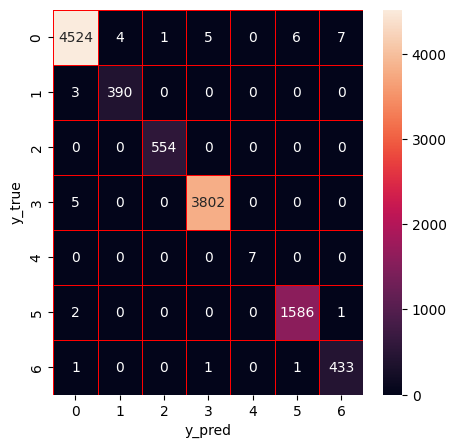

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)                                                           # creates a  object random state of 0,ensures reproducible results .
dt.fit(X_train,y_train)                                                                                 # fits the  model on  training data (X_train) and  labels (y_train).
dt_score=dt.score(X_test,y_test)                                                                        # calculates the accuracy ofmodel on test set (X_test and y_test).
y_predict=dt.predict(X_test)                                                                            # predict the labels for test data using  trained model and store them in y_predict
y_true=y_test                                                                                           # actual labels are stored in y_true.
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)                                                                  # CONFUSION MATRIX
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

## Random Forest

Accuracy of RF: 0.9962940086473132
Precision of RF: 0.9963078881710408
Recall of RF: 0.9962940086473132
F1-score of RF: 0.9962833888487207
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4547
           1       0.97      0.98      0.98       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.99      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



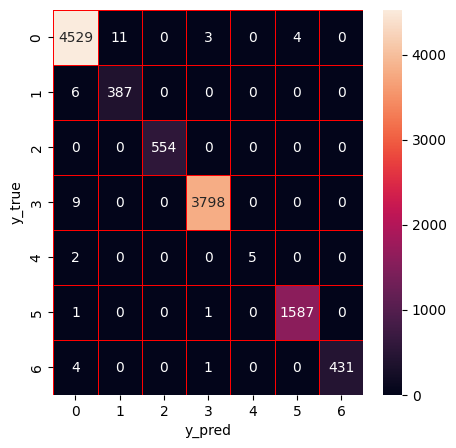

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

## Extra Trees

Accuracy of ET: 0.9953233918644666
Precision of ET: 0.9953255017621429
Recall of ET: 0.9953233918644666
F1-score of ET: 0.9953075685513322
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4547
           1       0.98      0.97      0.98       393
           2       1.00      0.99      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       1.00      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



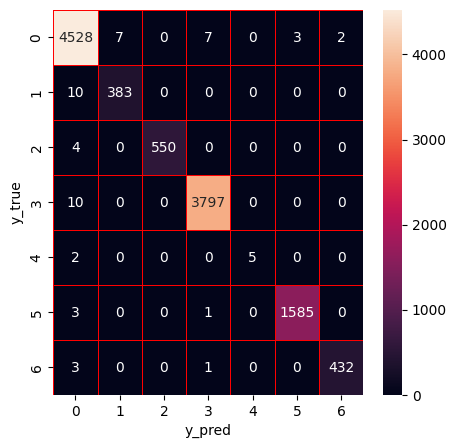

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

## XGBoost

Accuracy of XGBoost: 0.9955881055325156
Precision of XGBoost: 0.9955918224531761
Recall of XGBoost: 0.9955881055325156
F1-score of XGBoost: 0.9955711178626651
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4547
           1       0.99      0.98      0.98       393
           2       0.99      1.00      1.00       554
           3       0.99      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.99      1.00       436

    accuracy                           1.00     11333
   macro avg       1.00      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



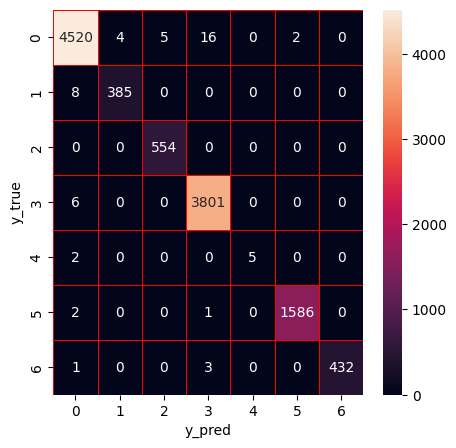

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)                           #  uses XGBoost (stored in xg) to predictions on  training set (stored in X_train) and assigns  predictions to the variable xg_train.
xg_test=xg.predict(X_test)                                                        # make predictions on   testing set (stored in X_test)  and assigns  predictions to the variable xg_test.

In [ ]:
base_predictions_train = pd.DataFrame({                # creates a pandas DataFrame called --base_predictions_train ---that 
    'DecisionTree': dt_train.ravel(),                  # contains the predictions made by four different models on the training set.
    'RandomForest': rf_train.ravel(),
    'ExtraTrees': et_train.ravel(),
    'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,5,5,5,5
1,3,3,3,3
2,5,5,5,5
3,3,3,3,3
4,2,2,2,2


In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train), axis=1)     # concatenate  predictions made by the four models  on the training and testing sets,
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test), axis=1)          # predictions are stacked horizontally to form a new array

## **Stack Model**

In [ ]:
stk = xgb.XGBClassifier().fit(x_train, y_train)                                 # variable will contain the trained XGBoost model, 
                                                                                # used to make predictions on new, unseen data or 
                                                                                # evaluate the performance of the model on a validation or testing set.

Accuracy of Stacking: 0.9967351980940616
Precision of Stacking: 0.9967433779773336
Recall of Stacking: 0.9967351980940616
F1-score of Stacking: 0.9967370334972472
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4547
           1       0.99      0.99      0.99       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00      1589
           6       0.98      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.99      1.00      1.00     11333
weighted avg       1.00      1.00      1.00     11333



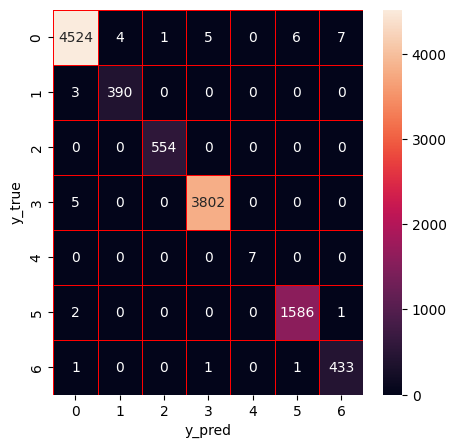

In [ ]:
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_feature = dt.feature_importances_                                            # extracts the feature importances from a Decision Tree model and stores them in the dt_feature variable.
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
xgb_feature = xg.feature_importances_

In [ ]:
avg_feature = (dt_feature+rf_feature+et_feature+xgb_feature)/4                  # calculate average of model

In [ ]:
feature=(df.drop(['Label'],axis=1)).columns.values                              # sorts the features in a pandas DataFrame df based on their average feature importance scores 
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True))

Features sorted by their score:
[(0.1095, 'Bwd Packet Length Min'), (0.1084, 'Bwd Packet Length Std'), (0.1016, 'Destination Port'), (0.0596, 'Average Packet Size'), (0.0416, 'Init_Win_bytes_backward'), (0.0372, 'Active Std'), (0.0315, 'PSH Flag Count'), (0.028, 'Bwd Packets/s'), (0.0279, 'Bwd Packet Length Mean'), (0.0269, 'Packet Length Variance'), (0.0247, 'Init_Win_bytes_forward'), (0.0201, 'Packet Length Std'), (0.0199, 'Avg Bwd Segment Size'), (0.0186, 'Bwd Header Length'), (0.0153, 'Bwd Packet Length Max'), (0.0151, 'Packet Length Mean'), (0.0147, 'Max Packet Length'), (0.014, 'Total Length of Fwd Packets'), (0.0132, 'FIN Flag Count'), (0.0129, 'ACK Flag Count'), (0.0125, 'min_seg_size_forward'), (0.0122, 'act_data_pkt_fwd'), (0.0119, 'Fwd Header Length'), (0.0112, 'Fwd IAT Min'), (0.0093, 'Total Fwd Packets'), (0.0092, 'Min Packet Length'), (0.0092, 'Fwd Header Length.1'), (0.0088, 'Flow IAT Max'), (0.0087, 'Down/Up Ratio'), (0.0087, 'Bwd IAT Max'), (0.0082, 'Subflow Fwd Bytes'

In [ ]:
f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), feature), reverse=True)          # calculates the length of the list f_list, which contains a sorted list of tuples r
len(f_list)

78

In [ ]:
sum = 0                                                                         # calculates the cumulative sum of feature importances until the sum exceeds 0.9 and 
for i in range(0, len(f_list)):                                                 # stores the corresponding feature names in a list fs []
fs = []
  sum = sum + f_list[i][0]
  fs.append(f_list[i][1])
  if sum >= 0.9:
    break

In [ ]:
X_fs = df[fs].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
X_train.shape

(45328, 38)

In [ ]:
pd.Series(y_train).value_counts()

0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4       29
dtype: int64

In [ ]:
smote=SMOTE(n_jobs=-1,sampling_strategy={4:1500})
X_train, y_train = smote.fit_resample(X_train, y_train)
pd.Series(y_train).value_counts()

/usr/local/lib/python3.9/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


0    18184
3    15228
5     6357
2     2213
6     1744
1     1573
4     1500
dtype: int64

Accuracy of DT: 0.9968234359834113
Precision of DT: 0.9968286852565558
Recall of DT: 0.9968234359834113
F1-score of DT: 0.9968243975913275
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4547
           1       0.99      0.99      0.99       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00      1589
           6       0.98      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       0.99      1.00      1.00     11333
weighted avg       1.00      1.00      1.00     11333



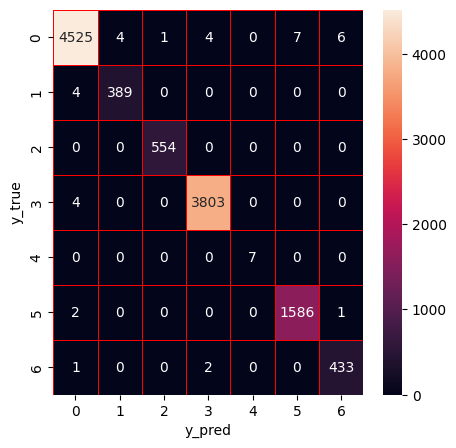

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)

Accuracy of RF: 0.9974411012088591
Precision of RF: 0.9974409791398017
Recall of RF: 0.9974411012088591
F1-score of RF: 0.997424571590988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4547
           1       0.99      0.98      0.99       393
           2       1.00      1.00      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       1.00      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



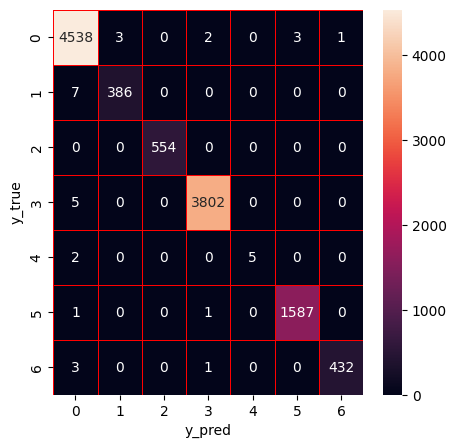

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train)
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
rf_train=rf.predict(X_train)
rf_test=rf.predict(X_test)

Accuracy of ET: 0.9964704844260125
Precision of ET: 0.9964708911962491
Recall of ET: 0.9964704844260125
F1-score of ET: 0.9964545865568019
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4547
           1       0.99      0.98      0.99       393
           2       1.00      0.99      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       1.00      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       1.00      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



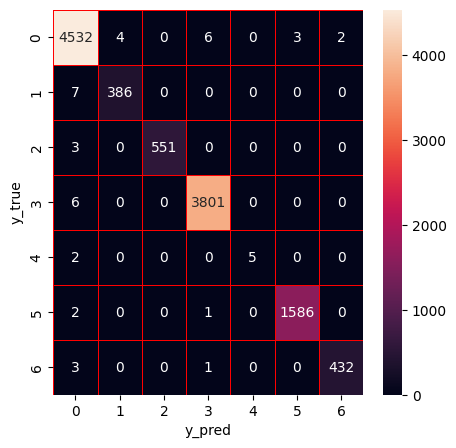

In [ ]:
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET: '+ str(et_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of ET: '+(str(precision)))
print('Recall of ET: '+(str(recall)))
print('F1-score of ET: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)

Accuracy of XGBoost: 0.9953233918644666
Precision of XGBoost: 0.9953261388853651
Recall of XGBoost: 0.9953233918644666
F1-score of XGBoost: 0.9953051152662237
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4547
           1       0.99      0.98      0.98       393
           2       0.99      1.00      1.00       554
           3       0.99      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.98      0.99       436

    accuracy                           1.00     11333
   macro avg       0.99      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



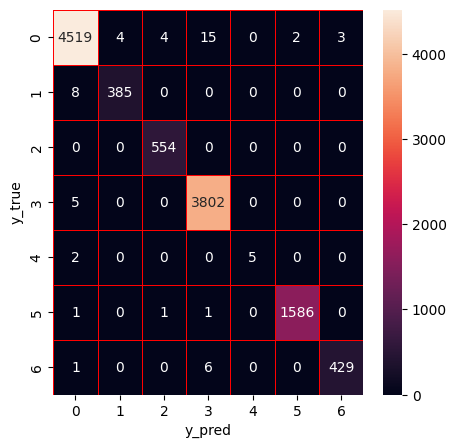

In [ ]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

In [ ]:
base_predictions_train = pd.DataFrame({
    'DecisionTree': dt_train.ravel(),
    'RandomForest': rf_train.ravel(),
    'ExtraTrees': et_train.ravel(),
    'XgBoost': xg_train.ravel(),
    })
base_predictions_train.head(5)

,DecisionTree,RandomForest,ExtraTrees,XgBoost
0,5,5,5,5
1,3,3,3,3
2,5,5,5,5
3,3,3,3,3
4,2,2,2,2


In [ ]:
dt_train=dt_train.reshape(-1, 1)
et_train=et_train.reshape(-1, 1)
rf_train=rf_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
dt_test=dt_test.reshape(-1, 1)
et_test=et_test.reshape(-1, 1)
rf_test=rf_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)

In [ ]:
x_train = np.concatenate((dt_train, et_train, rf_train, xg_train), axis=1)
x_test = np.concatenate((dt_test, et_test, rf_test, xg_test), axis=1)

### **Stack ---> XGBoost**

Accuracy of Stacking: 0.9963822465366629
Precision of Stacking: 0.9963830778515008
Recall of Stacking: 0.9963822465366629
F1-score of Stacking: 0.9963656258547763
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4547
           1       0.99      0.98      0.99       393
           2       1.00      0.99      1.00       554
           3       1.00      1.00      1.00      3807
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00      1589
           6       0.99      0.99      0.99       436

    accuracy                           1.00     11333
   macro avg       1.00      0.95      0.97     11333
weighted avg       1.00      1.00      1.00     11333



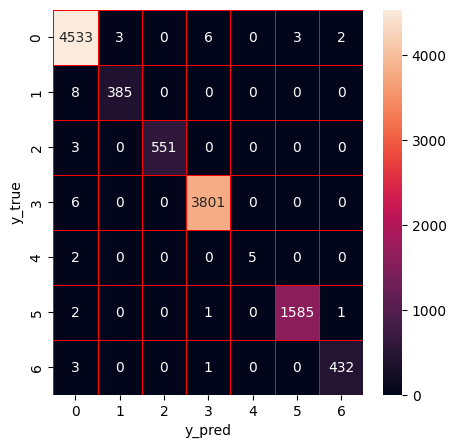

In [ ]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: '+ str(stk_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of Stacking: '+(str(precision)))
print('Recall of Stacking: '+(str(recall)))
print('F1-score of Stacking: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()